<a href="https://colab.research.google.com/github/SindaBenJemaa/Detection-de-forme/blob/master/Building_and_Training_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers
import os



ce code génère un ensemble de points aléatoires le long d’une onde sinusoïdale et affiche ces points pour montrer la distribution sinusoïdale des données.








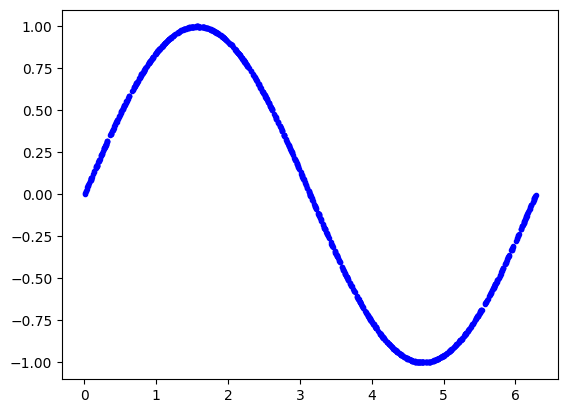

In [ ]:
#Cette ligne définit le nombre de points de données que nous allons générer pour simuler un signal sinusoïdal. Ici, SAMPLES est fixé à 1000.
SAMPLES = 1000
#La graine (SEED) est un nombre utilisé pour initialiser le générateur de nombres aléatoires. Fixer une graine permet de reproduire les mêmes résultats chaque fois que le code est exécuté, ce qui est pratique pour le débogage ou pour partager des résultats cohérents. Ici, np.random.seed(SEED) et tf.random.set_seed(SEED) assurent que les nombres aléatoires générés par NumPy et TensorFlow restent identiques à chaque exécution.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

#Cette ligne génère SAMPLES (1000) valeurs aléatoires uniformément distribuées entre 0 et 2𝜋
#2π(qui est environ 6,2832). Cela couvre une oscillation complète d'une onde sinusoïdale, puisque la fonction sinus a un cycle complet de 2𝜋
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

#La fonction shuffle mélange les valeurs de x_values pour s'assurer qu'elles ne sont pas dans l'ordre croissant ou décroissant. Cela permet de casser l'ordre séquentiel des points, ce qui peut être utile pour l'entraînement d'un modèle de machine learning, car cela introduit une certaine diversité dans les données.
np.random.shuffle(x_values)

#Cette ligne calcule la fonction sinus pour chaque valeur dans x_values et stocke les résultats dans y_values.
#Chaque point y est le résultat de sin(x) pour les différentes valeurs de x, ce qui nous donne un ensemble de points de données représentant une onde sinusoïdale.
y_values = np.sin(x_values)

#Cette section trace les points (x, y) sous forme de points bleus ('b.' signifie "blue dots") pour visualiser l'onde sinusoïdale. La fonction plt.show() affiche le graphique.
plt.plot(x_values, y_values, 'b.')
plt.show()

cette section ajoute une légère variation aléatoire aux valeurs de y, ce qui donne un aspect plus naturel aux données.

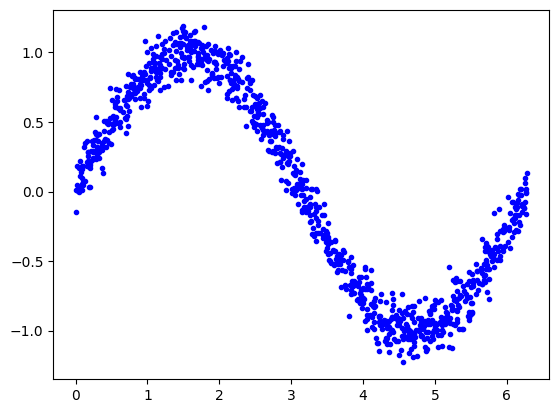

In [ ]:
# Cette ligne ajoute un bruit aléatoire aux valeurs de y_values pour rendre les données moins parfaites et plus proches de données réelles. Le bruit est généré avec np.random.randn(*y_values.shape), qui crée un tableau de nombres aléatoires normalement distribués ayant la même forme que y_values. En multipliant par 0.1, on ajuste l’intensité du bruit.
#Ce bruit permet de simuler des données du monde réel où les valeurs ne suivent pas une fonction mathématique parfaite en raison de variations ou d'erreurs.
y_values += 0.1 * np.random.randn(*y_values.shape)

# Cette section trace les points (x, y) avec le bruit ajouté, ce qui donnera une onde sinusoïdale légèrement perturbée, rendant le graphique plus réaliste.
plt.plot(x_values, y_values, 'b.')
plt.show()

ce code divise les données en ensembles d'entraînement, de validation et de test, puis les visualise pour confirmer la répartition.


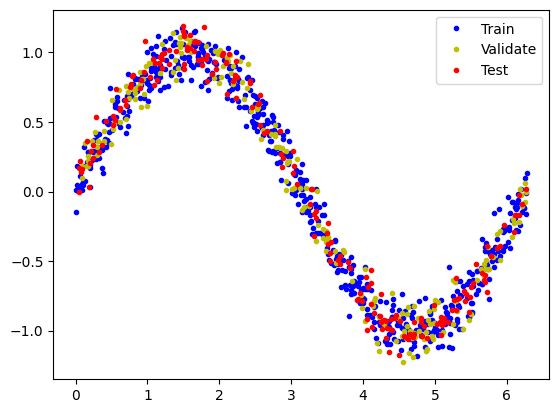

In [ ]:
#TRAIN_SPLIT calcule le nombre d'échantillons à utiliser pour l’entraînement (60% des SAMPLES). Ici, int(0.6 * SAMPLES) donne 600 échantillons si SAMPLES vaut 1000.
#TEST_SPLIT détermine l’indice jusqu’auquel inclure les données de test. On ajoute 20% des SAMPLES (soit 200) à TRAIN_SPLIT, ce qui nous donne un total de 800. Les 200 échantillons restants (les derniers 20%) seront utilisés pour la validation.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

#La fonction np.split découpe les tableaux x_values et y_values aux indices spécifiés dans les listes [TRAIN_SPLIT, TEST_SPLIT]. Avec ces indices, np.split divise les données en trois parties :

#x_train et y_train contiennent les premiers 60% des données.
#x_validate et y_validate contiennent les 20% suivants pour la validation.
#x_test et y_test contiennent les 20% restants pour le test.
#x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
#y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

#Cette ligne utilise une assertion pour vérifier que le nombre total d'échantillons dans les ensembles x_train, x_validate, et x_test correspond bien à SAMPLES. Si les tailles ne correspondent pas, une erreur se déclenche.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Cette partie trace chaque ensemble de données en utilisant une couleur différente :

#x_train, y_train en bleu pour l’ensemble d'entraînement,
#x_validate, y_validate en jaune pour l’ensemble de validation,
#x_test, y_test en rouge pour l’ensemble de test.
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend() #La fonction plt.legend() ajoute une légende pour identifier chaque ensemble, et plt.show() affiche le graphique.
plt.show()

 ce code crée un modèle simple de réseau de neurones pour prédire une valeur continue. Il contient une couche cachée de 16 neurones avec activation ReLU, et une couche de sortie pour une prédiction scalaire. Le modèle est configuré pour utiliser l'optimiseur RMSprop et la perte MSE, et le résumé affiche sa structure complète.

In [ ]:
#Cette ligne initialise un modèle séquentiel vide avec Keras. Le modèle séquentiel est une pile linéaire de couches, où les données passent d'une couche à l'autre dans un ordre déterminé. Ce type de modèle est bien adapté pour des architectures simples.
model_1 = tf.keras.Sequential()

#layers.Dense(16, activation='relu', input_shape=(1,)) ajoute une couche dense (ou entièrement connectée) avec 16 neurones.
#input_shape=(1,) indique que chaque entrée est un scalaire (une seule valeur), car x_values contient des valeurs individuelles de type flottant.
#activation='relu' signifie que chaque neurone utilise la fonction d’activation ReLU (Rectified Linear Unit). ReLU met à zéro toutes les valeurs négatives et conserve les positives, ce qui aide à modéliser des relations non linéaires.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

#Cette couche dense finale contient un seul neurone sans fonction d'activation spécifiée. Ce neurone produit une sortie scalaire, ce qui est adapté pour des problèmes de régression où nous prédisons une seule valeur continue (ici, la sortie sinusoïdale bruitée).
model_1.add(layers.Dense(1))

#optimizer='rmsprop' : L'optimiseur RMSprop est utilisé pour ajuster les poids du modèle, afin de minimiser l'erreur. RMSprop est un optimiseur standard pour les réseaux de neurones, bien adapté pour des problèmes de régression.
#loss='mse' : La fonction de perte MSE (Mean Squared Error) mesure l'erreur quadratique moyenne entre les prédictions et les valeurs réelles, ce qui est couramment utilisé pour les tâches de régression.
#metrics=['mae'] : La métrique mae (Mean Absolute Error) est également calculée lors de l'entraînement pour évaluer la performance du modèle en termes d'erreur absolue moyenne.
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#Cette ligne affiche un résumé du modèle, incluant le type de chaque couche, le nombre de neurones, la forme des sorties et le nombre total de paramètres (poids et biais) à entraîner.
model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

cette ligne entraîne le modèle sur les données d'entraînement pendant 1000 époques, avec une taille de lot de 16, et évalue la performance après chaque époque sur l'ensemble de validation. L’historique des métriques est enregistré dans history_1.

**Entraîner le modèle avec fit :**
fit est la méthode qui entraîne le modèle sur les données d'entraînement et ajuste les poids du réseau pour minimiser l'erreur.

**x_train, y_train :** Ce sont les ensembles de données d’entrée et de sortie utilisés pour l’entraînement. x_train contient les valeurs de x et y_train les valeurs de y cibles.

**epochs=1000 :** Ce paramètre indique le nombre de fois que le modèle va passer en entier sur les données d'entraînement. Ici, il s’agit de 1000 itérations, ce qui signifie que les poids du modèle seront ajustés 1000 fois, en utilisant l'ensemble complet de données d'entraînement.

**batch_size=16 :** Ce paramètre indique que le modèle va traiter 16 échantillons de données à la fois avant d'ajuster les poids. Un plus petit batch size peut permettre une mise à jour plus fréquente des poids, mais cela peut aussi rendre l'entraînement plus lent.
**validation_data=(x_validate, y_validate) :** Ici, le modèle utilise l'ensemble de validation pour évaluer la performance après chaque époque, sans ajuster les poids avec ces données. Cela permet de suivre l’évolution de la précision du modèle en dehors des données d'entraînement.


**Stocker l'historique d'entraînement :**

La variable history_1 contient l’historique de l’entraînement, incluant les valeurs de la fonction de perte et des métriques (ici, MSE et MAE) pour chaque époque, tant pour l'ensemble d'entraînement que pour l'ensemble de validation. Cet historique peut être utile pour visualiser la progression de l’entraînement et vérifier si le modèle est en train de converger ou de surapprendre.

In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7504 - mae: 0.7523 - val_loss: 0.4616 - val_mae: 0.5972
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4062 - mae: 0.5560 - val_loss: 0.3773 - val_mae: 0.5314
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3375 - mae: 0.5045 - val_loss: 0.3176 - val_mae: 0.4842
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2863 - mae: 0.4650 - val_loss: 0.2726 - val_mae: 0.4484
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2481 - mae: 0.4358 - val_loss: 0.2399 - val_mae: 0.4225
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2208 - mae: 0.4130 - val_loss: 0.2174 - val_mae: 0.4044
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2025 - mae: 0.3966 - val_loss: 0.2026 - val_mae: 0.3905
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1906 - mae: 0.3845 - val_loss: 0.1931 - val_mae: 0.3792
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

ce code visualise l'évolution des pertes d'entraînement et de validation au fil des époques. Cela permet de vérifier si le modèle converge bien et d'identifier si un surapprentissage (augmentation de la perte de validation alors que la perte d'entraînement diminue) est en cours.

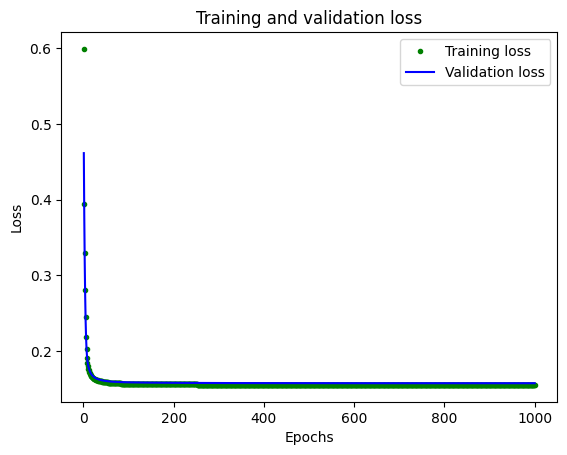

In [ ]:
loss = history_1.history['loss'] #history_1.history['loss'] contient les valeurs de la fonction de perte calculées pour l'ensemble d'entraînement à chaque époque.
val_loss = history_1.history['val_loss'] #history_1.history['val_loss'] contient les valeurs de la perte pour l'ensemble de validation après chaque époque.
#Ces données sont stockées dans loss et val_loss pour faciliter leur manipulation et leur traçage.


#range(1, len(loss) + 1) crée une séquence d'époques allant de 1 au nombre total d’époques (len(loss)), pour chaque point dans loss. Cette plage est utilisée pour l’axe des abscisses dans le graphique.
epochs = range(1, len(loss) + 1)

#Tracer la courbe de perte d'entraînement et de validation
#plt.title, plt.xlabel, et plt.ylabel ajoutent un titre et des étiquettes aux axes pour rendre le graphique plus lisible.


plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Ce code affiche la courbe de perte d'entraînement et de validation, tout en excluant les 100 premières époques pour rendre le graphique plus lisible et se concentrer sur la tendance de la convergence.


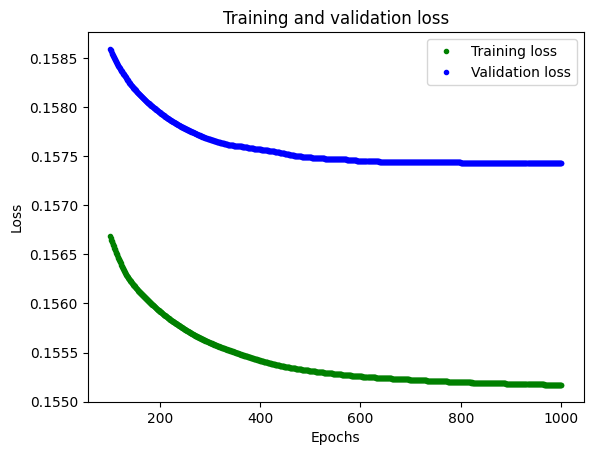

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

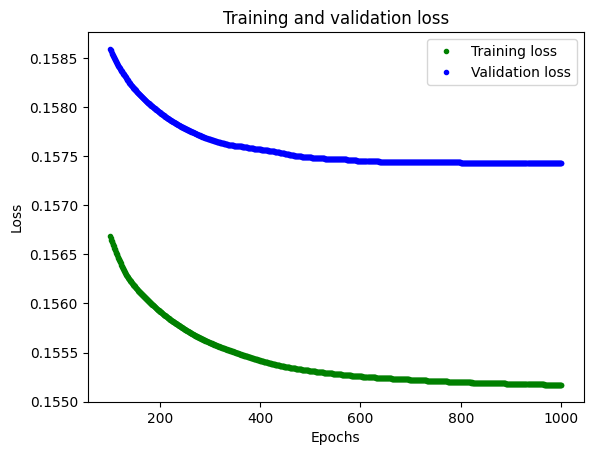

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Ce code trace la courbe de l'erreur absolue moyenne (MAE - Mean Absolute Error) pour évaluer la précision du modèle à chaque époque, en excluant les 100 premières époques pour plus de clarté.

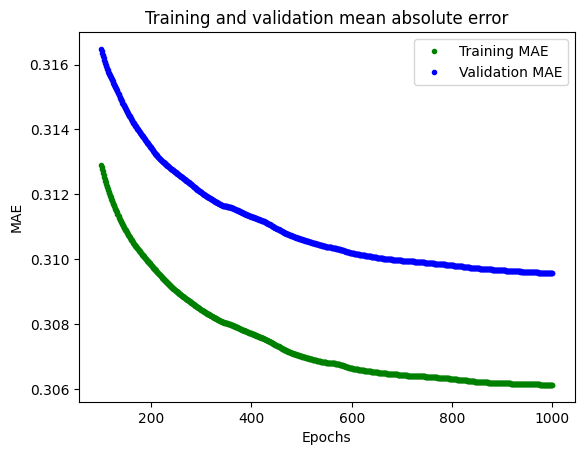

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Ce code utilise le modèle pour effectuer des prédictions sur les données d'entraînement, puis compare ces prédictions aux valeurs réelles des données de test.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


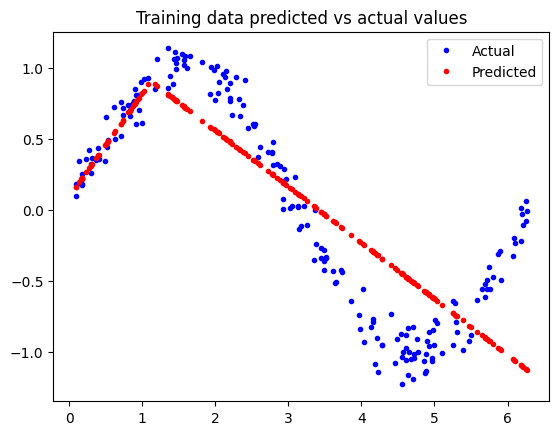

In [ ]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_validate)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_validate, y_validate, 'b.', label='Actual')
plt.plot(x_validate, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Ce code crée un deuxième modèle de réseau de neurones, model_2, avec une architecture légèrement plus complexe que le premier modèle. Cette architecture vise à améliorer la capacité d'apprentissage du modèle en ajoutant une couche cachée supplémentaire.

In [ ]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5673 - mae: 1.2592 - val_loss: 0.6992 - val_mae: 0.7597
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5594 - mae: 0.6725 - val_loss: 0.4738 - val_mae: 0.6005
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4197 - mae: 0.5623 - val_loss: 0.3974 - val_mae: 0.5473
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3564 - mae: 0.5183 - val_loss: 0.3380 - val_mae: 0.5019
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3038 - mae: 0.4794 - val_loss: 0.2869 - val_mae: 0.4604
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2590 - mae: 0.4437 - val_loss: 0.2448 - val_mae: 0.4244
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2231 - mae: 0.4117 - val_loss: 0.2138 - val_mae: 0.3953
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1967 - mae: 0.3855 - val_loss: 0.1924 - val_mae: 0.3723
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.179

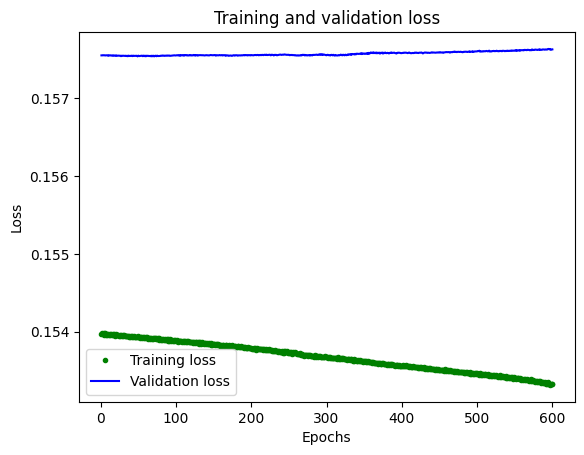

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

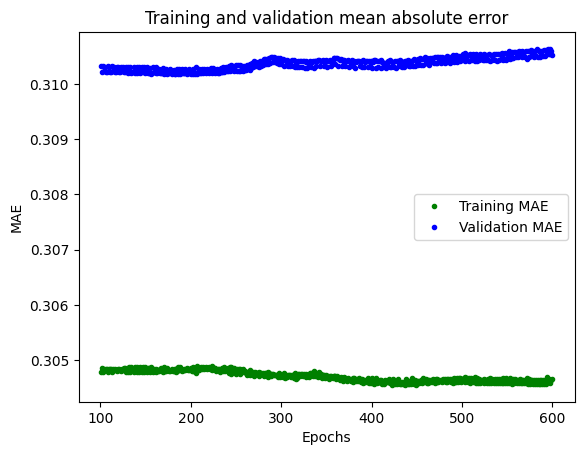

In [ ]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1638 - mae: 0.3211 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


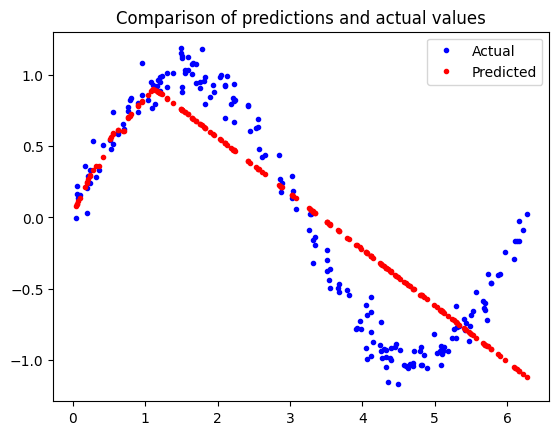

In [ ]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmp2a6krrsp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140078481662448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140078481668608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140078481987840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140078481990832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140078481992064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140078481995584: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmp42s_ekf_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140078481662448: TensorSpe

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3776

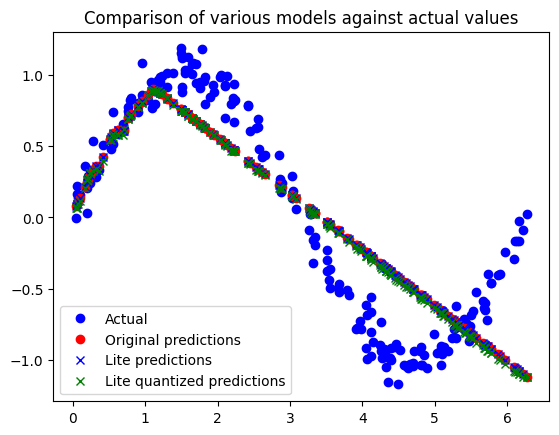

In [ ]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
  sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor\
  (sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
  label='Lite quantized predictions')
plt.legend()
plt.show()

In [ ]:
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3152 bytes
Quantized model is 3776 bytes
Difference is -624 bytes


In [ ]:
!apt-get -qq install xxd

In [ ]:
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc


In [ ]:
!cat sine_model_quantized.cc


unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x0c, 0x01, 0x00, 0x00,
  0x00, 0x04, 0x00, 0x00, 0x10, 0x04, 0x00, 0x00, 0x34, 0x0e, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xae, 0xfb, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x68, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x6f, 0x75, 0x74, 0x70, 0x75, 0x74, 0x5f, 0x30, 0x00, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x86, 0xfc, 0x

In [ ]:
!xxd -i sine_model_quantized.tflite > sine_model_quantized.h